# Chapter 4: Cumulative distribution functions

## Reading

In [1]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/first.py")


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download(
    "https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz"
)

In [2]:
import numpy as np
import thinkstats2
import thinkplot

In [3]:
import first

live, firsts, others = first.MakeFrames()

PMFs aren't so useful if you have a lot of possible values.

In [4]:
first_wgt = firsts.totalwgt_lb
first_wgt_dropna = first_wgt.dropna()
print(f'firsts: {len(first_wgt)}, after dropping nans: {len(first_wgt_dropna)}')

other_wgt = others.totalwgt_lb
other_wgt_dropna = other_wgt.dropna()
print(f'others: {len(other_wgt)}, after dropping nans: {len(other_wgt_dropna)}')

first_pmf = thinkstats2.Pmf(first_wgt_dropna, label='first')
other_pmf = thinkstats2.Pmf(other_wgt_dropna, label='other')

firsts: 4413, after dropping nans: 4363
others: 4735, after dropping nans: 4675


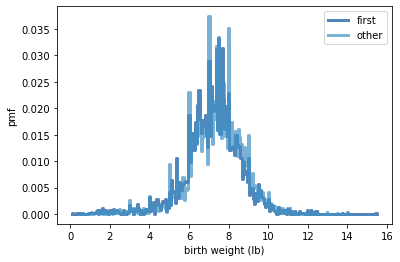

In [5]:
width = 0.4 / 16
thinkplot.PrePlot(2)
thinkplot.Pmfs([first_pmf, other_pmf])
thinkplot.Config(xlabel='birth weight (lb)', ylabel='pmf')

Percentile rank and percentile:

In [6]:
def PercentileRank(scores, your_score):
    count = 0
    for score in scores:
        if score <= your_score:
            count += 1
            
    percentile_rank = 100.0 * count / len(scores)
    
    return percentile_rank

In [8]:
def Percentile(scores, percentile_rank):
    scores.sort()
    index = percentile_rank * (len(scores)-1) // 100
    return scores[int(index)]

Cumulative distribution function:

In [9]:
def EvalCdf(sample, x):
    count = 0.0
    for value in sample:
        if value <= x:
            count += 1
            
    prob = count / len(sample)
    return prob

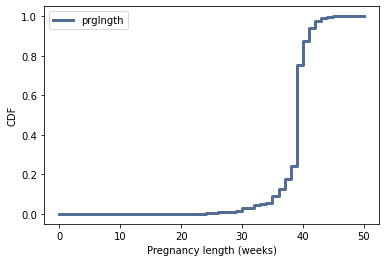

In [10]:
cdf = thinkstats2.Cdf(live.prglngth, label='prglngth')
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Pregnancy length (weeks)', ylabel='CDF', loc='upper left')

In [12]:
cdf.Prob(41)

0.9406427634455619

In [13]:
cdf.Value(0.5)

39

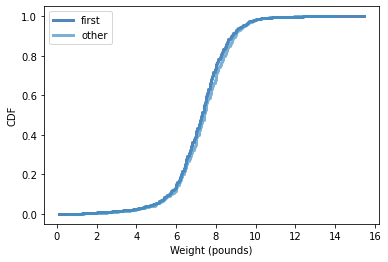

In [14]:
first_cdf = thinkstats2.Cdf(firsts.totalwgt_lb, label='first')
other_cdf = thinkstats2.Cdf(others.totalwgt_lb, label='other')

thinkplot.PrePlot(2)
thinkplot.Cdfs([first_cdf, other_cdf])
thinkplot.Config(xlabel='Weight (pounds)', ylabel='CDF')

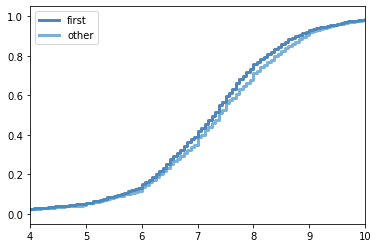

In [18]:
thinkplot.PrePlot(2)
thinkplot.Cdfs([first_cdf, other_cdf])
thinkplot.Config(xlim=(4, 10))

In [19]:
weights = live.totalwgt_lb
live_cdf = thinkstats2.Cdf(weights, label='live')

In [20]:
median = live_cdf.Percentile(50)
median

7.375

In [21]:
iqr = (live_cdf.Percentile(25), live_cdf.Percentile(75))
iqr

(6.5, 8.125)

In [22]:
live_cdf.PercentileRank(4 + 10/16)

3.961053330382828

Random numbers:

In [23]:
sample = np.random.choice(weights, 100, replace=True)
ranks = [live_cdf.PercentileRank(x) for x in sample]

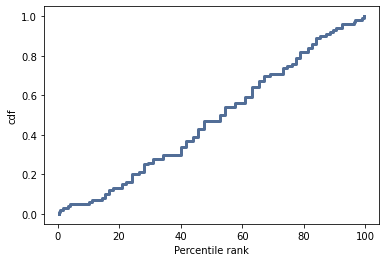

In [24]:
rank_cdf = thinkstats2.Cdf(ranks)
thinkplot.Cdf(rank_cdf)
thinkplot.Config(xlabel='Percentile rank', ylabel='cdf')

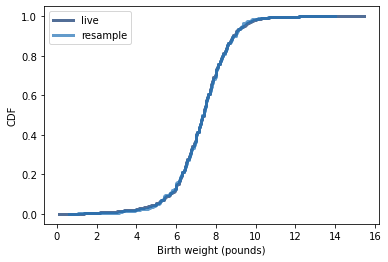

In [25]:
resample = live_cdf.Sample(1000)
thinkplot.Cdf(live_cdf)
thinkplot.Cdf(thinkstats2.Cdf(resample, label='resample'))
thinkplot.Config(xlabel='Birth weight (pounds)', ylabel='CDF')

**Exercise:** How much did you weigh at birth? If you don’t know, call your mother or someone else who knows. Using the NSFG data (all live births), compute the distribution of birth weights and use it to find your percentile rank. If you were a first baby, find your percentile rank in the distribution for first babies. Otherwise use the distribution for others. If you are in the 90th percentile or higher, call your mother back and apologize.

In [26]:
# Ed and Holly's baby
first_cdf.PercentileRank(4 + 10/16)

4.1714416685766675

**Exercise:** The numbers generated by `numpy.random.random` are supposed to be uniform between 0 and 1; that is, every value in the range should have the same probability.

Generate 1000 numbers from `numpy.random.random` and plot their PMF.  What goes wrong?

Now plot the CDF. Is the distribution uniform?

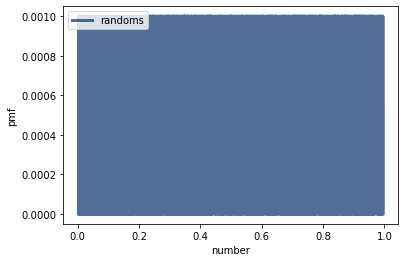

In [28]:
randoms = np.random.random(size=1000)

rnd_pmf = thinkstats2.Pmf(randoms, label='randoms')

thinkplot.Pmf(rnd_pmf)
thinkplot.Config(xlabel='number', ylabel='pmf')

The plot draws the line down to zero between each number.

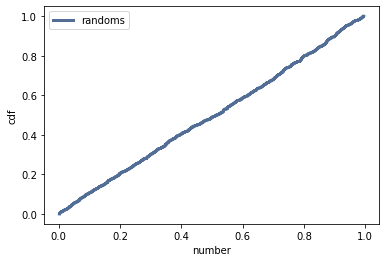

In [29]:
rnd_cdf = thinkstats2.Cdf(randoms, label='randoms')

thinkplot.Cdf(rnd_cdf)
thinkplot.Config(xlabel='number', ylabel='cdf')